# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

In [4]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        if index_counter % 50 == 0:
            
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 0 of Set 1 : yuli
Processing Record 0 of Set 2 : yuli
Processing Record 0 of Set 2 : chuy
Processing Record 0 of Set 3 : chuy
Processing Record 0 of Set 3 : hobart
Processing Record 0 of Set 4 : hobart
Processing Record 0 of Set 4 : mogadishu
Processing Record 0 of Set 5 : mogadishu
Processing Record 0 of Set 5 : zanjan
Processing Record 0 of Set 6 : zanjan
Processing Record 0 of Set 6 : oranjestad
Processing Record 0 of Set 7 : oranjestad
Processing Record 0 of Set 7 : barrow
Processing Record 0 of Set 8 : barrow
Processing Record 0 of Set 8 : ushuaia
Processing Record 0 of Set 9 : ushuaia
Processing Record 0 of Set 9 : castro
Processing Record 0 of Set 10 : castro
Processing Record 0 of Set 10 : altay
Processing Record 0 of Set 11 : altay
Processing Record 0 of Set 11 : salalah
Processing Record 0 of Set 12 : salalah
Processing Record 0 of Set 12 : cidreira
Processing Record 0 of Set 13 : cidreira
Processing Re

Processing Record 0 of Set 97 : ancud
Processing Record 0 of Set 98 : ancud
Processing Record 0 of Set 98 : zima
Processing Record 0 of Set 99 : zima
Processing Record 0 of Set 99 : tuktoyaktuk
Processing Record 0 of Set 100 : tuktoyaktuk
Processing Record 0 of Set 100 : vaini
Processing Record 0 of Set 101 : vaini
Processing Record 0 of Set 101 : atasu
Processing Record 0 of Set 102 : atasu
Processing Record 0 of Set 102 : laguna
Processing Record 0 of Set 103 : laguna
Processing Record 0 of Set 103 : mataura
Processing Record 0 of Set 104 : mataura
Processing Record 0 of Set 104 : la rinconada
Processing Record 0 of Set 105 : la rinconada
Processing Record 0 of Set 105 : spirovo
Processing Record 0 of Set 106 : spirovo
Processing Record 0 of Set 106 : nikolskoye
Processing Record 0 of Set 107 : nikolskoye
Processing Record 0 of Set 107 : bandarbeyla
Processing Record 0 of Set 108 : bandarbeyla
Processing Record 0 of Set 108 : umm kaddadah
Processing Record 0 of Set 109 : umm kaddadah

Processing Record 0 of Set 192 : doha
Processing Record 0 of Set 193 : doha
Processing Record 0 of Set 193 : hambantota
Processing Record 0 of Set 194 : hambantota
Processing Record 0 of Set 194 : constitucion
Processing Record 0 of Set 195 : constitucion
Processing Record 0 of Set 195 : pisco
Processing Record 0 of Set 196 : pisco
City not found. Skipping...
Processing Record 0 of Set 196 : buala
Processing Record 0 of Set 197 : buala
Processing Record 0 of Set 197 : souillac
Processing Record 0 of Set 198 : souillac
Processing Record 0 of Set 198 : abu kamal
Processing Record 0 of Set 199 : abu kamal
Processing Record 0 of Set 199 : adamas
Processing Record 0 of Set 200 : adamas
Processing Record 0 of Set 200 : shache
Processing Record 0 of Set 201 : shache
City not found. Skipping...
Processing Record 0 of Set 201 : pevek
Processing Record 0 of Set 202 : pevek
Processing Record 0 of Set 202 : beyneu
Processing Record 0 of Set 203 : beyneu
City not found. Skipping...
Processing Recor

Processing Record 0 of Set 291 : kodiak
Processing Record 0 of Set 292 : kodiak
Processing Record 0 of Set 292 : shieli
Processing Record 0 of Set 293 : shieli
Processing Record 0 of Set 293 : marawi
Processing Record 0 of Set 294 : marawi
Processing Record 0 of Set 294 : coquimbo
Processing Record 0 of Set 295 : coquimbo
Processing Record 0 of Set 295 : puerto maldonado
Processing Record 0 of Set 296 : puerto maldonado
Processing Record 0 of Set 296 : arkhara
Processing Record 0 of Set 297 : arkhara
Processing Record 0 of Set 297 : lishui
Processing Record 0 of Set 298 : lishui
Processing Record 0 of Set 298 : tautira
Processing Record 0 of Set 299 : tautira
Processing Record 0 of Set 299 : ribeira grande
Processing Record 0 of Set 300 : ribeira grande
Processing Record 0 of Set 300 : hammerfest
Processing Record 0 of Set 301 : hammerfest
Processing Record 0 of Set 301 : chirongui
Processing Record 0 of Set 302 : chirongui
Processing Record 0 of Set 302 : the pas
Processing Record 0 o

Processing Record 0 of Set 385 : tahlequah
Processing Record 0 of Set 386 : tahlequah
Processing Record 0 of Set 386 : darhan
Processing Record 0 of Set 387 : darhan
Processing Record 0 of Set 387 : saurimo
Processing Record 0 of Set 388 : saurimo
Processing Record 0 of Set 388 : cajica
Processing Record 0 of Set 389 : cajica
Processing Record 0 of Set 389 : belaya gora
Processing Record 0 of Set 390 : belaya gora
Processing Record 0 of Set 390 : vestmanna
Processing Record 0 of Set 391 : vestmanna
Processing Record 0 of Set 391 : chor
Processing Record 0 of Set 392 : chor
Processing Record 0 of Set 392 : chojnice
Processing Record 0 of Set 393 : chojnice
Processing Record 0 of Set 393 : shahkot
Processing Record 0 of Set 394 : shahkot
Processing Record 0 of Set 394 : pompeu
Processing Record 0 of Set 395 : pompeu
Processing Record 0 of Set 395 : kayes
Processing Record 0 of Set 396 : kayes
Processing Record 0 of Set 396 : nuuk
Processing Record 0 of Set 397 : nuuk
Processing Record 0 

Processing Record 0 of Set 483 : hasaki
Processing Record 0 of Set 484 : hasaki
Processing Record 0 of Set 484 : baiao
Processing Record 0 of Set 485 : baiao
Processing Record 0 of Set 485 : sarangani
Processing Record 0 of Set 486 : sarangani
Processing Record 0 of Set 486 : chernyshevskiy
Processing Record 0 of Set 487 : chernyshevskiy
Processing Record 0 of Set 487 : igrim
Processing Record 0 of Set 488 : igrim
Processing Record 0 of Set 488 : ritchie
Processing Record 0 of Set 489 : ritchie
Processing Record 0 of Set 489 : sao felix do xingu
Processing Record 0 of Set 490 : sao felix do xingu
Processing Record 0 of Set 490 : marzuq
Processing Record 0 of Set 491 : marzuq
Processing Record 0 of Set 491 : williamsburg
Processing Record 0 of Set 492 : williamsburg
City not found. Skipping...
Processing Record 0 of Set 492 : coffs harbour
Processing Record 0 of Set 493 : coffs harbour
Processing Record 0 of Set 493 : abalak
Processing Record 0 of Set 494 : abalak
City not found. Skippi

Processing Record 0 of Set 582 : jizan
Processing Record 0 of Set 583 : jizan
Processing Record 0 of Set 583 : codrington
Processing Record 0 of Set 584 : codrington
Processing Record 0 of Set 584 : haines junction
Processing Record 0 of Set 585 : haines junction
Processing Record 0 of Set 585 : miramar
Processing Record 0 of Set 586 : miramar
Processing Record 0 of Set 586 : catamarca
Processing Record 0 of Set 587 : catamarca
Processing Record 0 of Set 587 : juneau
Processing Record 0 of Set 588 : juneau
Processing Record 0 of Set 588 : carballo
Processing Record 0 of Set 589 : carballo
Processing Record 0 of Set 589 : puerto cabezas
Processing Record 0 of Set 590 : puerto cabezas
City not found. Skipping...
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [7]:
# Count data
weather_dict.count()

City          589
Cloudiness    589
Country       589
Date          589
Humidity      589
Lat           589
Lng           589
Max Temp      589
Wind Speed    589
dtype: int64

In [8]:
# Display the Data Frame
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Yuli,100,NG,1590283815,60,9.70,10.27,81.16,3.24
1,Chui,49,UY,1590283815,84,-33.70,-53.46,55.54,12.41
2,Hobart,75,AU,1590283802,87,-42.88,147.33,52.00,14.99
3,Mogadishu,3,SO,1590283816,81,2.04,45.34,80.19,17.81
4,Zanjān,0,IR,1590283816,56,36.67,48.48,58.68,7.87
...,...,...,...,...,...,...,...,...,...
584,Miramar,20,US,1590283858,83,25.99,-80.23,81.00,10.29
585,San Fernando del Valle de Catamarca,0,AR,1590283586,59,-28.47,-65.79,53.01,1.01
586,Juneau,90,US,1590283858,58,58.30,-134.42,57.20,14.99
587,Carballo,100,ES,1590283858,80,43.21,-8.69,57.99,1.01


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

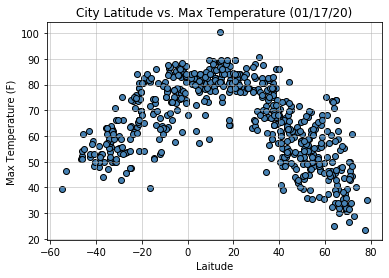

In [12]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

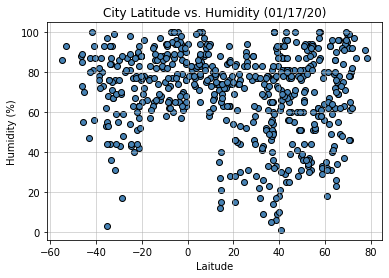

In [13]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

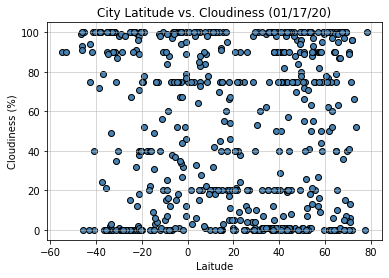

In [14]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

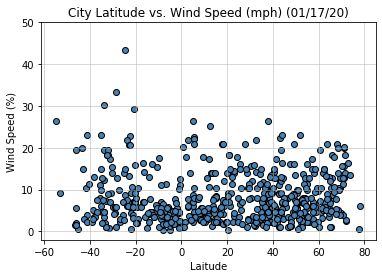

In [15]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [ ]:

# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression